
# Raster and Vector files

In this notebook we will learn what is the difference between raster and vector data and how to handle them.

### Raster Data:

A raster graphics represents a two-dimensional picture as a rectangular matrix or grid of square pixels. If we consider geospatial raster each pixel represent a specific location on the Earth's surface and can contain data about that specific location. They can be used for spatial analysis as terrain modeling, interpolation and remote sensing applications.

Rasters are resolution dependent and the cell size and the number of pixels determines the level of detail of the image.

Common raster geospatial data formats include GeoTIFF, JPEG, and NetCDF, among others.

### Vector Data:

Vector data is the most common type of GIS data. Vector data represents geographic data symbolized as points, lines, or polygons. This kind of data is resolution independent because it uses precise geometric coordinates to represent features. You can zoom in without losing details.

Vector data is ideal for representing discrete features, such as roads, buildings, administrative boundaries, and individual data points like cities or survey locations.

Common vector geospatial data formats include Shapefile, GeoJSON, KML (Keyhole Markup Language), and many others.

In [1]:
# import libraries
import geopandas as gpd
import os
import zipfile
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd
from rasterio.mask import mask
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

C:\Users\degas\Documents\Github\YouTube\GeoSpatial\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# we will use the SentinelAPI to obtain raster data
# More information here https://sentinelsat.readthedocs.io/en/latest/api_reference.html
# To use SentinelSat you need to create an account in https://scihub.copernicus.eu/

In [4]:
name = 'put_your_credentials'
password = 'put_your_credentials'
api = SentinelAPI(name, password, 'https://scihub.copernicus.eu/dhus')

In [5]:
# we have an example AOI (Area of interest)
geo_shape_path = os.path.join(os.getcwd(), 'data', 'aoi.geojson')

In [6]:
geojson = read_geojson(geo_shape_path)
geojson

{"crs": {"properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}, "type": "name"}, "features": [{"geometry": {"coordinates": [[[[1.637882, 49.574005], [8.227844, 51.101885], [16.101244, 49.924848], [16.274014, 46.130823], [8.474659, 45.459701], [1.465112, 46.01096], [1.637882, 49.574005]]]], "type": "MultiPolygon"}, "properties": {"id": 1}, "type": "Feature"}], "name": "aoi", "type": "FeatureCollection"}

In [7]:
# read the geojson AOI and convert to wkt
footprint = geojson_to_wkt(geojson)
footprint

'GEOMETRYCOLLECTION(MULTIPOLYGON(((1.6379 49.5740,8.2278 51.1019,16.1012 49.9248,16.2740 46.1308,8.4747 45.4597,1.4651 46.0110,1.6379 49.5740))))'

In [8]:
products = api.query(footprint,
                     date=('20230801', date(2023, 8, 6)),
                     platformname='Sentinel-2',
                     cloudcoverpercentage=(0, 30), limit=1)

In [9]:
# create folder to download data if it does not exists
if not os.path.exists("downloaded"):
    os.makedirs("downloaded")

In [ ]:
# run only if you don't have already downloaded the data
api.download_all(products, directory_path="downloaded")

In [10]:
# convert downloaded captures to Pandas DataFrame
products_df = api.to_dataframe(products)
products_df

,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,generationdate,beginposition,endposition,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid
34412427-6cca-4ed7-8cc7-b98608238c8d,S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-05T10:36:29.024Z, Instrument: MS...",false,2023-08-05 10:36:29.024,2023-08-05 11:18:23,2023-08-05 10:36:29.024,2023-08-05 10:36:29.024,...,GS2B_20230805T103629_033496_N05.09,S2MSI1C,2017-013A,ASCENDING,Sentinel-2B,Level-1C,S2B_OPER_MSI_L1C_DS_2BPS_20230805T111823_S2023...,S2B_OPER_MSI_L1C_TL_2BPS_20230805T111823_A0334...,S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV_2...,34412427-6cca-4ed7-8cc7-b98608238c8d


In [11]:
# GeoJSON FeatureCollection containing footprints and metadata of the scenes
api.to_geojson(products)

{"features": [{"geometry": {"coordinates": [[[[7.635442, 48.878031], [7.638254, 48.884067], [7.705949, 49.028727], [7.774208, 49.173338], [7.842261, 49.318108], [7.91178, 49.462601], [7.98135, 49.607141], [8.000368, 49.646515], [7.614272, 49.64443], [7.635442, 48.878031]]]], "type": "MultiPolygon"}, "id": 0, "properties": {"beginposition": "2023-08-05T10:36:29.024000Z", "cloudcoverpercentage": 29.3586579323399, "datastripidentifier": "S2B_OPER_MSI_L1C_DS_2BPS_20230805T111823_S20230805T103641_N05.09", "datatakesensingstart": "2023-08-05T10:36:29.024000Z", "endposition": "2023-08-05T10:36:29.024000Z", "filename": "S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV_20230805T111823.SAFE", "format": "SAFE", "generationdate": "2023-08-05T11:18:23.000000Z", "granuleidentifier": "S2B_OPER_MSI_L1C_TL_2BPS_20230805T111823_A033496_T32UMV_N05.09", "hv_order_tileid": "UV32M", "id": "34412427-6cca-4ed7-8cc7-b98608238c8d", "identifier": "S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV_20230805T111823", "inges

In [12]:
# Convert downloaded scenes to GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
api.to_geodataframe(products)

,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,generationdate,beginposition,endposition,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
34412427-6cca-4ed7-8cc7-b98608238c8d,S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-05T10:36:29.024Z, Instrument: MS...",false,2023-08-05 10:36:29.024,2023-08-05 11:18:23,2023-08-05 10:36:29.024,2023-08-05 10:36:29.024,...,S2MSI1C,2017-013A,ASCENDING,Sentinel-2B,Level-1C,S2B_OPER_MSI_L1C_DS_2BPS_20230805T111823_S2023...,S2B_OPER_MSI_L1C_TL_2BPS_20230805T111823_A0334...,S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV_2...,34412427-6cca-4ed7-8cc7-b98608238c8d,"MULTIPOLYGON (((7.63544 48.87803, 7.63825 48.8..."


In [13]:
# Get basic information about the product: its title, file size, MD5 sum, date, footprint and
# its download url
# you can take the id from the first column in the dataframe above
ID = "34412427-6cca-4ed7-8cc7-b98608238c8d"
api.get_product_odata(ID)

{'id': '34412427-6cca-4ed7-8cc7-b98608238c8d',
 'title': 'S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV_20230805T111823',
 'size': 108353788,
 'md5': '6be60c6fdfa348af79bed16f2536bec4',
 'date': datetime.datetime(2023, 8, 5, 10, 36, 29, 24000),
 'footprint': 'POLYGON((8.000367516273538 49.646515168171824,7.981350055506662 49.60714116659862,7.911779758254381 49.462600930121134,7.842261376997609 49.31810756151624,7.774207663896628 49.17333783666321,7.705949386420675 49.02872675914401,7.63825376590721 48.88406713316374,7.635441573772065 48.87803056800699,7.614272368185703 49.64443007346099,8.000367516273538 49.646515168171824))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('34412427-6cca-4ed7-8cc7-b98608238c8d')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2023, 8, 5, 13, 57, 8, 365000),
 'Ingestion Date': datetime.datetime(2023, 8, 5, 13, 56, 38, 736000),
 'manifest_name': 'manifest.safe',
 'product_root_dir': 'S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV

In [14]:
# Get the product's full metadata available on the server
api.get_product_odata(ID, full=True)

{'id': '34412427-6cca-4ed7-8cc7-b98608238c8d',
 'title': 'S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV_20230805T111823',
 'size': 108353788,
 'md5': '6be60c6fdfa348af79bed16f2536bec4',
 'date': datetime.datetime(2023, 8, 5, 10, 36, 29, 24000),
 'footprint': 'POLYGON((8.000367516273538 49.646515168171824,7.981350055506662 49.60714116659862,7.911779758254381 49.462600930121134,7.842261376997609 49.31810756151624,7.774207663896628 49.17333783666321,7.705949386420675 49.02872675914401,7.63825376590721 48.88406713316374,7.635441573772065 48.87803056800699,7.614272368185703 49.64443007346099,8.000367516273538 49.646515168171824))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('34412427-6cca-4ed7-8cc7-b98608238c8d')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2023, 8, 5, 13, 57, 8, 365000),
 'Ingestion Date': datetime.datetime(2023, 8, 5, 13, 56, 38, 736000),
 'Cloud cover percentage': 29.3586579323399,
 'Datatake sensing start': datetime.datetime(2023, 8, 5,

In [15]:
# let's see downloade files
os.listdir("downloaded")

['sentinel', 'sentinel.zip']

### Data description

We have downloaded Sentinel-2 L1C data (source: https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-2-msi/product-types/level-1c). 

The data format is described at https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-2-msi/data-formats. Images are stored inside the GRANULE subfolder.

In [ ]:
# rename file with a shorter name (Windows doesn't like long paths)
os.rename("downloaded/S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV_20230805T111823.zip", "downloaded/sentinel.zip")
# let's extract the downloaded file
with zipfile.ZipFile("downloaded/sentinel.zip", 'r') as zip_ref:
    zip_ref.extractall("downloaded/sentinel")

In [16]:
# plot some of the downloaded data

In [17]:
path_images = "downloaded/sentinel/S2B_MSIL1C_20230805T103629_N0509_R008_T32UMV_20230805T111823.SAFE/GRANULE/L1C_T32UMV_A033496_20230805T103641/IMG_DATA"
os.listdir(path_images)

['T32UMV_20230805T103629_B01.jp2',
 'T32UMV_20230805T103629_B02.jp2',
 'T32UMV_20230805T103629_B03.jp2',
 'T32UMV_20230805T103629_B04.jp2',
 'T32UMV_20230805T103629_B05.jp2',
 'T32UMV_20230805T103629_B06.jp2',
 'T32UMV_20230805T103629_B07.jp2',
 'T32UMV_20230805T103629_B08.jp2',
 'T32UMV_20230805T103629_B09.jp2',
 'T32UMV_20230805T103629_B10.jp2',
 'T32UMV_20230805T103629_B11.jp2',
 'T32UMV_20230805T103629_B12.jp2',
 'T32UMV_20230805T103629_B8A.jp2',
 'T32UMV_20230805T103629_TCI.jp2']

Sentinel-2 L1C data consists of 12 bands images and a true color image. Each band has its own resolution as reported in the following table 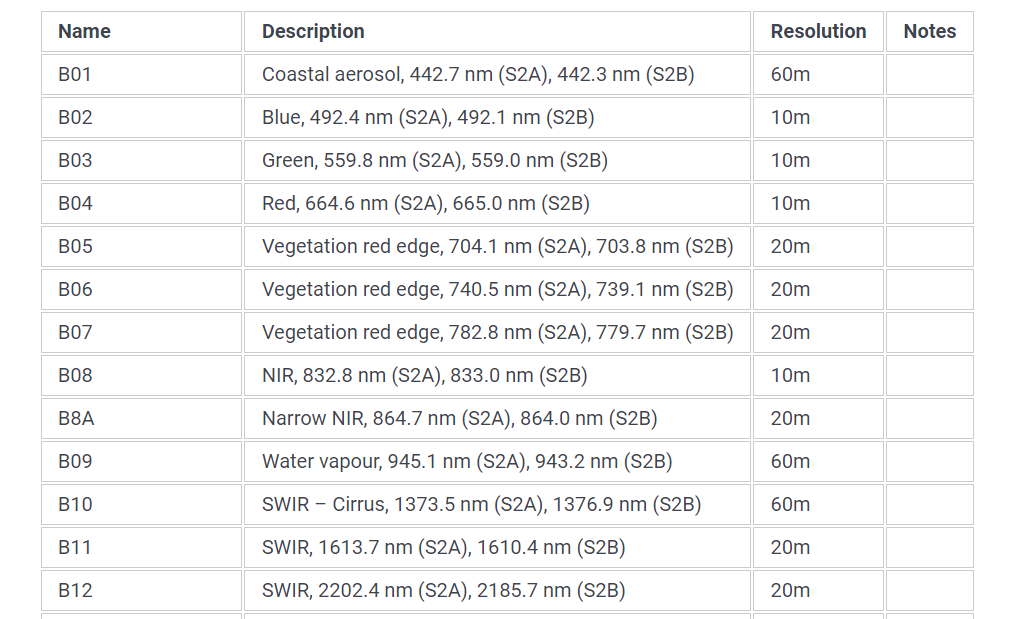

Source: https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l1c/

In [20]:
# Let's plot the true color image
image_path = os.path.join(path_images, 'T32UMV_20230805T103629_TCI.jp2')
# jp2_image = Image.open(image_path)

In [37]:
# since the input image is too big we will read only a window of the raster
# this can be done with rasterio
window = rasterio.windows.Window(col_off=0, row_off=0, width=4000, height=4000)

# Open the raster file using Rasterio
with rasterio.open(image_path) as src:
    
    # Read the data for the specified window
    window_data = src.read(window=window)  # Change the band number if you have multiple bands

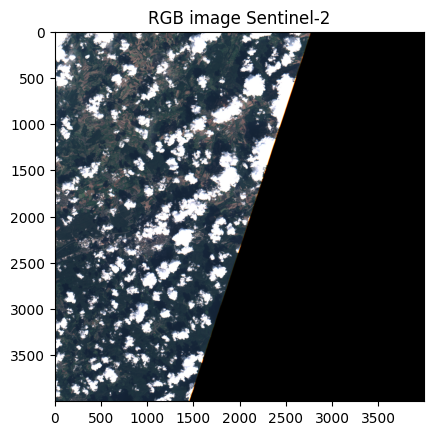

In [38]:
# Step 3: Display the image using Matplotlib
window_data = window_data.transpose(1, 2, 0)
plt.imshow(window_data)
plt.axis('on')  # Show axis
plt.title("RGB image Sentinel-2")
plt.show()

In [39]:
# black area represent masked pixel (i.e. pixels without any data)

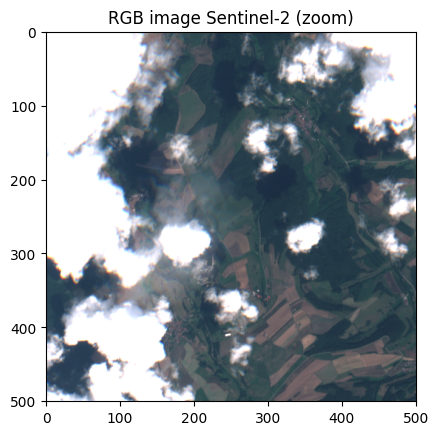

In [40]:
# zoom the plot
plt.imshow(window_data)
plt.axis('on')  # Show axis
plt.title("RGB image Sentinel-2 (zoom)")
plt.xlim(0, 500)  
plt.ylim(500, 0) 
plt.show()

We will now see how to crop a raster with a vector data

In [41]:
# Example: Read a vector file
gdf = gpd.read_file('data/aoi_crop.geojson')

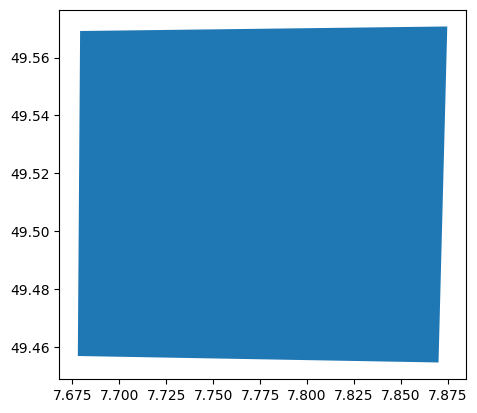

In [42]:
# Plot the data
gdf.plot()
plt.show()

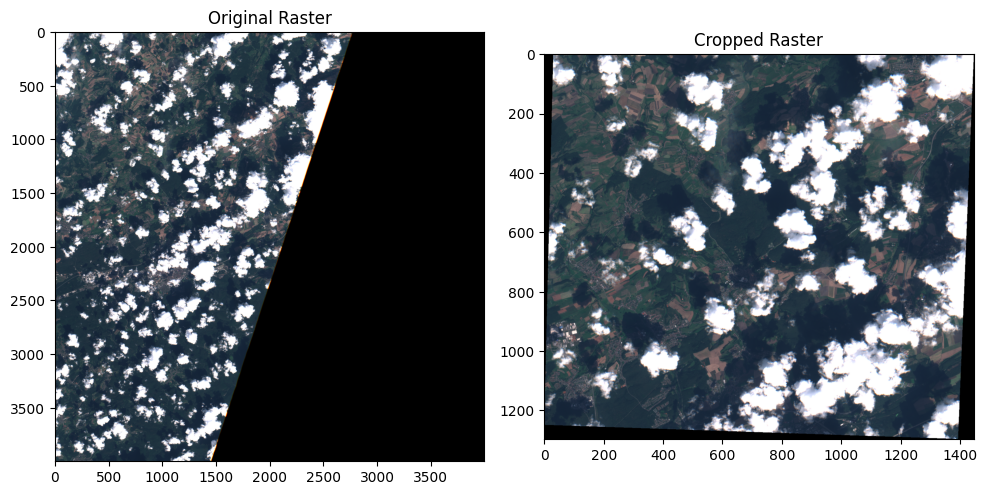

In [45]:
# since the input image is too big we will read only a window of the raster
# this can be done with rasterio
window = rasterio.windows.Window(col_off=0, row_off=0, width=4000, height=4000)

# Open the raster file for reading
with rasterio.open(image_path) as src:
    
    # convert geodataframe to the raster crs before cropping
    shape = gdf.to_crs(src.crs)
    # Crop the raster using the aoi geometry
    out_image, out_transform = mask(src, shape.geometry, crop=True)
    
    # Read the data for the specified window
    raster = src.read(window=window)  # Change the band number if you have multiple bands
    
    # Plot the original raster
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    # to plot rgb bands
    plt.imshow(raster.transpose(1, 2, 0))
    plt.title('Original Raster')

    # Plot the cropped raster
    plt.subplot(1, 2, 2)
    plt.imshow(out_image.transpose(1, 2, 0))
    plt.title('Cropped Raster')

    plt.tight_layout()
    plt.show()

In [44]:
# You can see a sub area of the original image on the left while on the right we have cropped and plotted a subregion of the image